<a href="https://colab.research.google.com/github/pacayton/Stat280_FA_Codes/blob/main/Chap_2_Stat280FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 2 Time Series Graphics

In [1]:
## Preamble

install.packages("fpp2")
library(fpp2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.3.6      ✔ fma       2.4   
✔ forecast  8.17.0     ✔ expsmooth 2.3   





Uploading data in Google Colab

1. Click the Files icon (folder) in the left side of the Google Colab page,
2. Click the "Upload to session storage" icon (paper with upward arrow) and a directory box will open.
3. Select your file from the directory and press OK.

In [2]:
### Read the Files

Philmonth <- read.csv("/content/PhilMonthlyData.csv", header =T)
Philquarter <- read.csv("/content/PhilQuarterData.csv", header =T)

In [3]:
## Check on the data

str(Philmonth)
str(Philquarter)

'data.frame':	264 obs. of  37 variables:
 $ X_date_         : chr  "1989-01-01" "1989-02-01" "1989-03-01" "1989-04-01" ...
 $ cpi             : num  NA NA NA NA NA NA NA NA NA NA ...
 $ cpifbt          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ deporate_savings: num  NA NA NA NA NA NA NA NA NA NA ...
 $ dubaicrude      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ expenditures    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ exports         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ fx_rate         : num  NA NA NA NA NA NA NA NA NA NA ...
 $ gir             : num  NA NA NA NA NA NA NA NA NA NA ...
 $ hotel_occupancy : num  NA NA NA NA NA NA NA NA NA NA ...
 $ imports         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ libor_3m        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ libor_6m        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ m1_imf          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ m2_imf          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ man_avecaputili : num  NA NA NA NA

ts objects = basic object in R for time series data analysis

In [5]:
## Example

y <- ts(c(123, 39, 78, 52, 110), start = 2012)

In [6]:
## Check 
str(y)
summary(y)
y

 Time-Series [1:5] from 2012 to 2016: 123 39 78 52 110


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   39.0    52.0    78.0    80.4   110.0   123.0 

A Time Series:
[1] 123  39  78  52 110

In [9]:
## Example for Seasonal Data

nonagri <- ts(Philquarter$nonagri, start = c(1981,1), frequency = 4)

In [12]:
str(nonagri)
nonagri

 Time-Series [1:112] from 1981 to 2009: 117667 121185 117881 125430 123269 ...


,Qtr1,Qtr2,Qtr3,Qtr4
1981,117667.0,121185.0,117881.0,125430.0
1982,123269.0,125858.0,123449.0,131250.0
1983,128112.0,136132.0,126157.0,130730.0
1984,121299.0,124943.0,110288.0,117185.0
1985,104479.0,109727.0,103380.0,113743.0
1986,103833.0,112608.0,111294.0,117963.0
1987,107221.0,116357.0,119656.0,123275.0
1988,115605.0,121997.0,124496.0,141191.0
1989,122980.0,131451.0,131832.0,153221.0
1990,131605.0,136898.0,137658.0,153795.0


In [13]:
hotelocc <- ts( na.omit(Philmonth$hotel_occupancy), start = c(2000,1), frequency = 12)


In [14]:
hotelocc

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2001,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2002,51.59500,57.73250,53.09500,56.51000,56.41750,52.49000,54.53000,53.51250,54.78500,57.48250,59.05750,54.99500
2003,54.05821,64.03250,55.54250,50.84750,53.71750,52.58250,56.76750,59.74250,61.00250,65.70750,68.62250,63.82500
2004,63.68500,70.39750,68.06500,66.33250,64.20250,62.33250,65.07750,64.38750,65.76500,67.03250,68.81067,66.29829
2005,66.58750,71.44500,67.80000,71.28500,69.86500,67.29250,66.52000,66.00500,64.84750,67.34000,74.43750,70.08807
2006,72.96500,73.79750,68.38250,68.51500,70.97750,64.43500,67.22500,66.12000,66.96000,68.68500,75.53750,71.12639
2007,74.59250,77.24000,73.26250,70.20250,72.01250,69.46750,70.91000,68.91750,69.73500,68.91250,73.88250,67.51000
2008,71.37000,75.20000,69.26500,73.64500,71.40250,65.70250,65.32000,63.56250,63.20000,68.43000,69.23000,61.50000
2009,64.13390,68.89215,64.54464,64.83269,65.11408,61.90907,63.61740,63.26045,63.56350,66.02322,68.96274,65.02663


In [15]:
hotelocc2 <- ts( Philmonth$hotel_occupancy, start = c(1989,1), frequency = 12)
## NAs retained

In [16]:
hotelocc2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1990,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1991,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1992,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1993,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1994,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1995,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1996,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1998,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [17]:
window(hotelocc2, start = c(2000,1), end = c(2009,12))
## Selecting a window of observations

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2001,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2002,51.59500,57.73250,53.09500,56.51000,56.41750,52.49000,54.53000,53.51250,54.78500,57.48250,59.05750,54.99500
2003,54.05821,64.03250,55.54250,50.84750,53.71750,52.58250,56.76750,59.74250,61.00250,65.70750,68.62250,63.82500
2004,63.68500,70.39750,68.06500,66.33250,64.20250,62.33250,65.07750,64.38750,65.76500,67.03250,68.81067,66.29829
2005,66.58750,71.44500,67.80000,71.28500,69.86500,67.29250,66.52000,66.00500,64.84750,67.34000,74.43750,70.08807
2006,72.96500,73.79750,68.38250,68.51500,70.97750,64.43500,67.22500,66.12000,66.96000,68.68500,75.53750,71.12639
2007,74.59250,77.24000,73.26250,70.20250,72.01250,69.46750,70.91000,68.91750,69.73500,68.91250,73.88250,67.51000
2008,71.37000,75.20000,69.26500,73.64500,71.40250,65.70250,65.32000,63.56250,63.20000,68.43000,69.23000,61.50000
2009,64.13390,68.89215,64.54464,64.83269,65.11408,61.90907,63.61740,63.26045,63.56350,66.02322,68.96274,65.02663


In [20]:
hotelocc3 <- Philmonth$hotel_occupancy %>% ts(start =c(1989,1), frequency = 12) %>% 
window(start = c(2000,1), end=c(2009,12))

## with the pipe operator, but selecting a window of observations

hotelocc3

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2001,49.15500,56.62250,51.56250,51.86500,52.77500,47.85750,50.82000,51.34500,49.66000,54.13750,54.24000,55.00000
2002,51.59500,57.73250,53.09500,56.51000,56.41750,52.49000,54.53000,53.51250,54.78500,57.48250,59.05750,54.99500
2003,54.05821,64.03250,55.54250,50.84750,53.71750,52.58250,56.76750,59.74250,61.00250,65.70750,68.62250,63.82500
2004,63.68500,70.39750,68.06500,66.33250,64.20250,62.33250,65.07750,64.38750,65.76500,67.03250,68.81067,66.29829
2005,66.58750,71.44500,67.80000,71.28500,69.86500,67.29250,66.52000,66.00500,64.84750,67.34000,74.43750,70.08807
2006,72.96500,73.79750,68.38250,68.51500,70.97750,64.43500,67.22500,66.12000,66.96000,68.68500,75.53750,71.12639
2007,74.59250,77.24000,73.26250,70.20250,72.01250,69.46750,70.91000,68.91750,69.73500,68.91250,73.88250,67.51000
2008,71.37000,75.20000,69.26500,73.64500,71.40250,65.70250,65.32000,63.56250,63.20000,68.43000,69.23000,61.50000
2009,64.13390,68.89215,64.54464,64.83269,65.11408,61.90907,63.61740,63.26045,63.56350,66.02322,68.96274,65.02663


Time plots

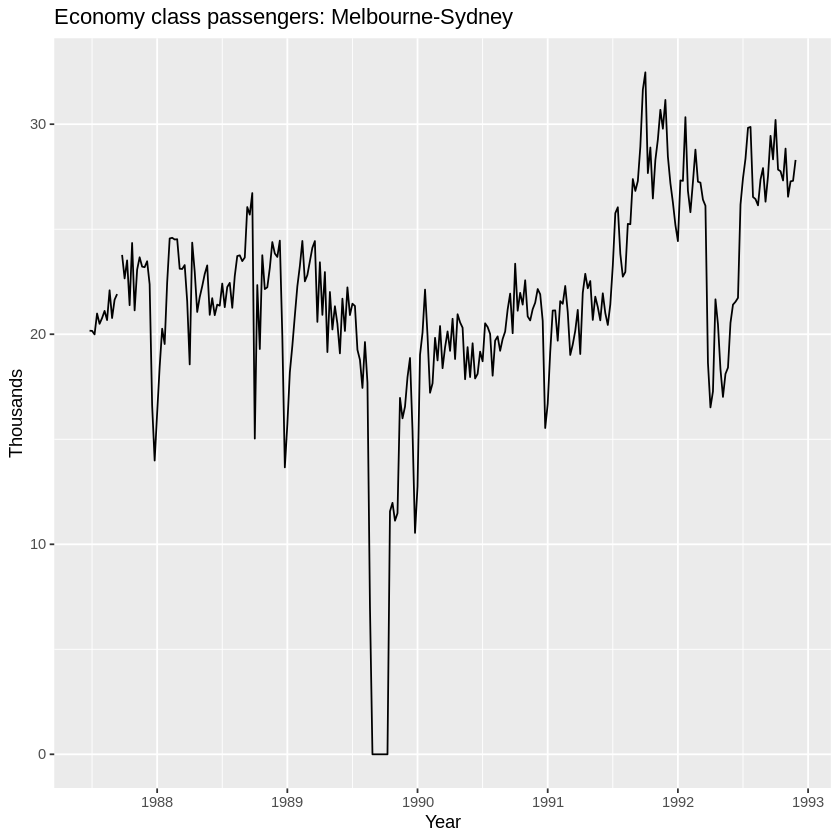

In [21]:
autoplot(melsyd[,"Economy.Class"]) +
  ggtitle("Economy class passengers: Melbourne-Sydney") +
  xlab("Year") +
  ylab("Thousands")

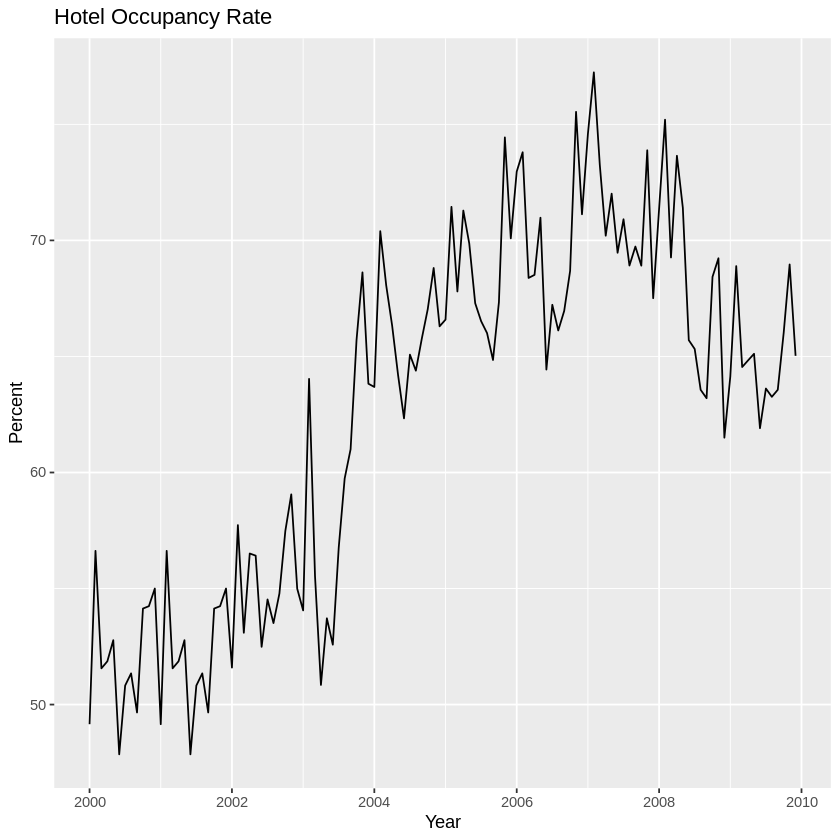

In [22]:
autoplot(hotelocc) +
  ggtitle("Hotel Occupancy Rate") +
  xlab("Year") +
  ylab("Percent")

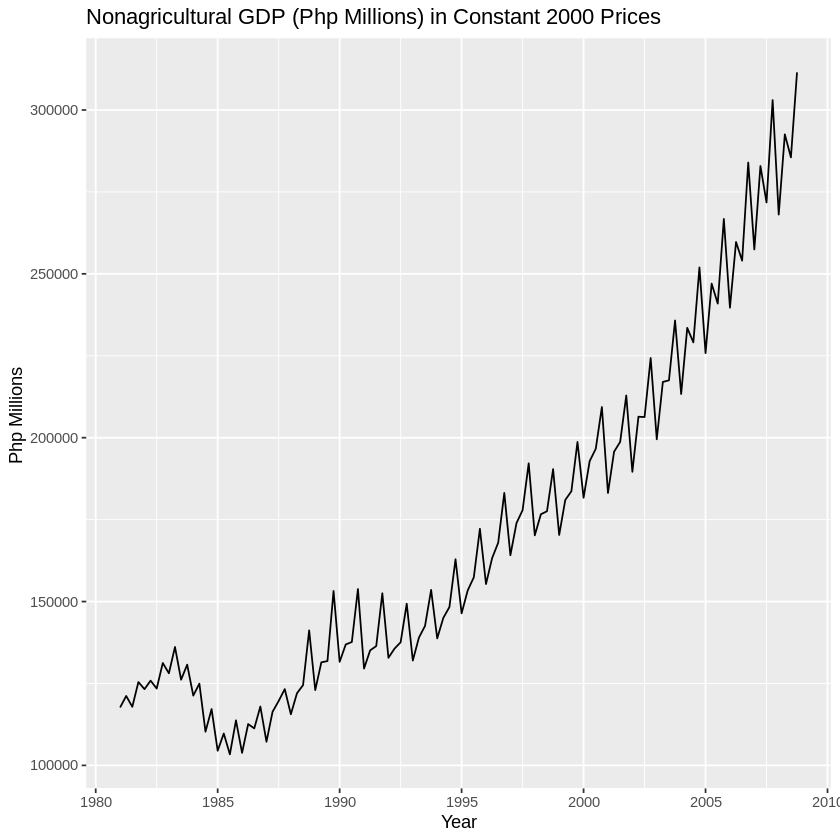

In [23]:
autoplot(nonagri) +
  ggtitle("Nonagricultural GDP (Php Millions) in Constant 2000 Prices") +
  xlab("Year") +
  ylab("Php Millions ")

Seasonal Plots

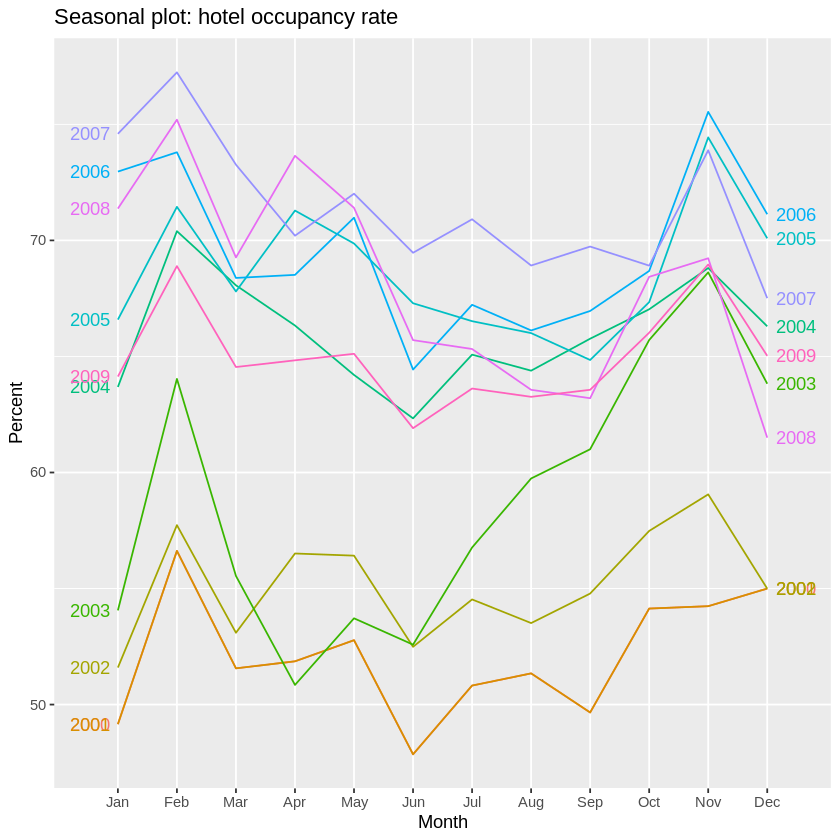

In [24]:
ggseasonplot(hotelocc, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Percent") +
  ggtitle("Seasonal plot: hotel occupancy rate")

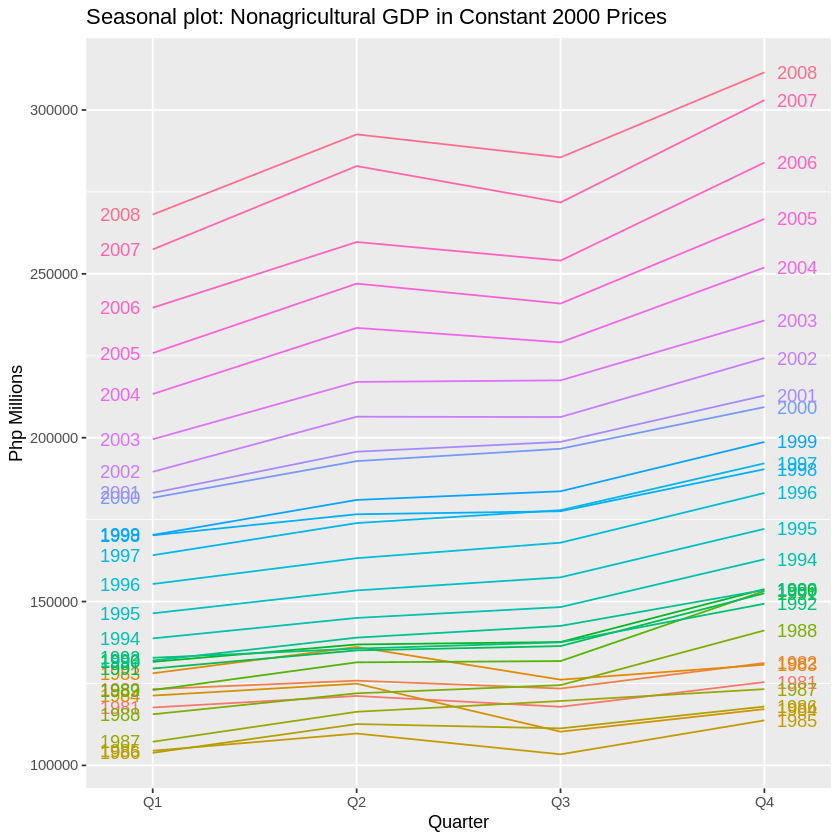

In [25]:
ggseasonplot(nonagri, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Php Millions") +
  ggtitle("Seasonal plot: Nonagricultural GDP in Constant 2000 Prices")

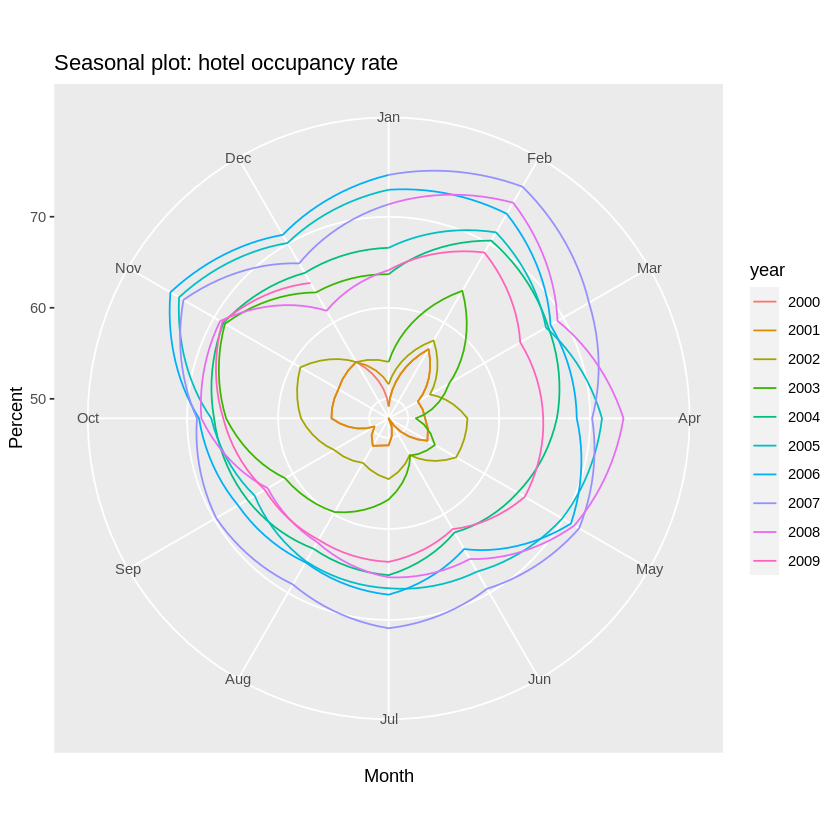

In [26]:
ggseasonplot(hotelocc, polar = TRUE) +
  ylab("Percent") +
  ggtitle("Seasonal plot: hotel occupancy rate")

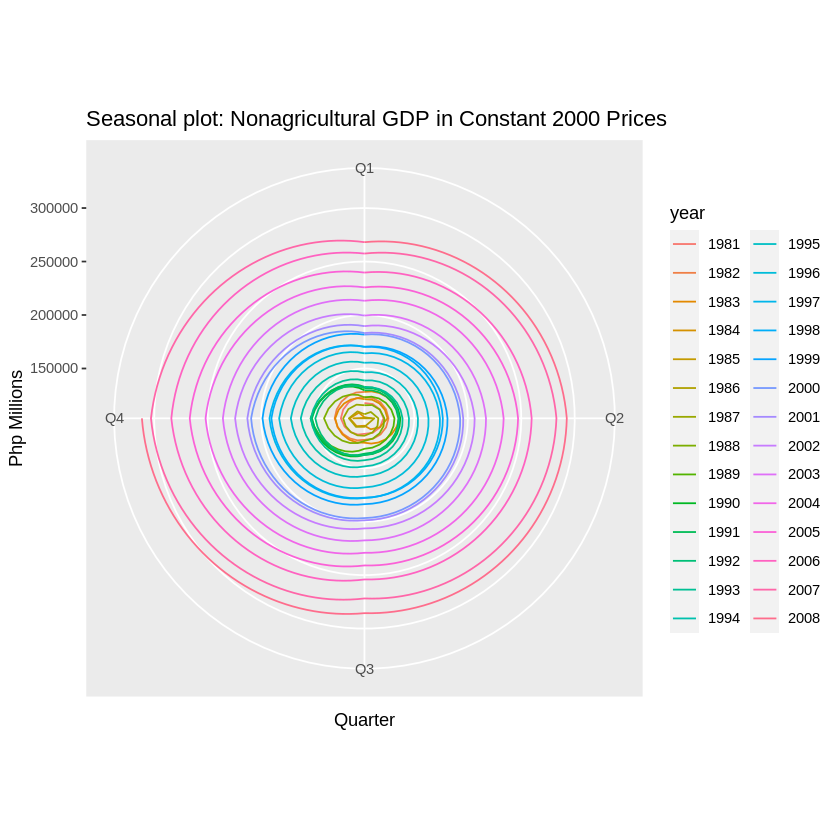

In [27]:
ggseasonplot(nonagri, polar=TRUE) +
  ylab("Php Millions") +
  ggtitle("Seasonal plot: Nonagricultural GDP in Constant 2000 Prices")

Seasonal Subseries Plot

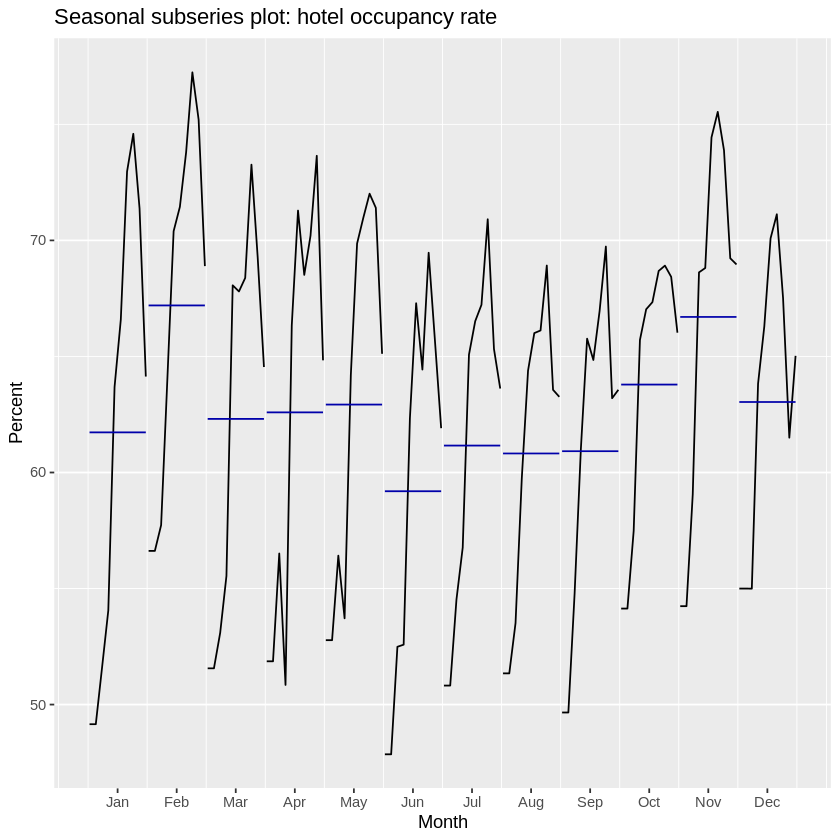

In [29]:
ggsubseriesplot(hotelocc) +
  ylab("Percent") +
  ggtitle("Seasonal subseries plot: hotel occupancy rate")

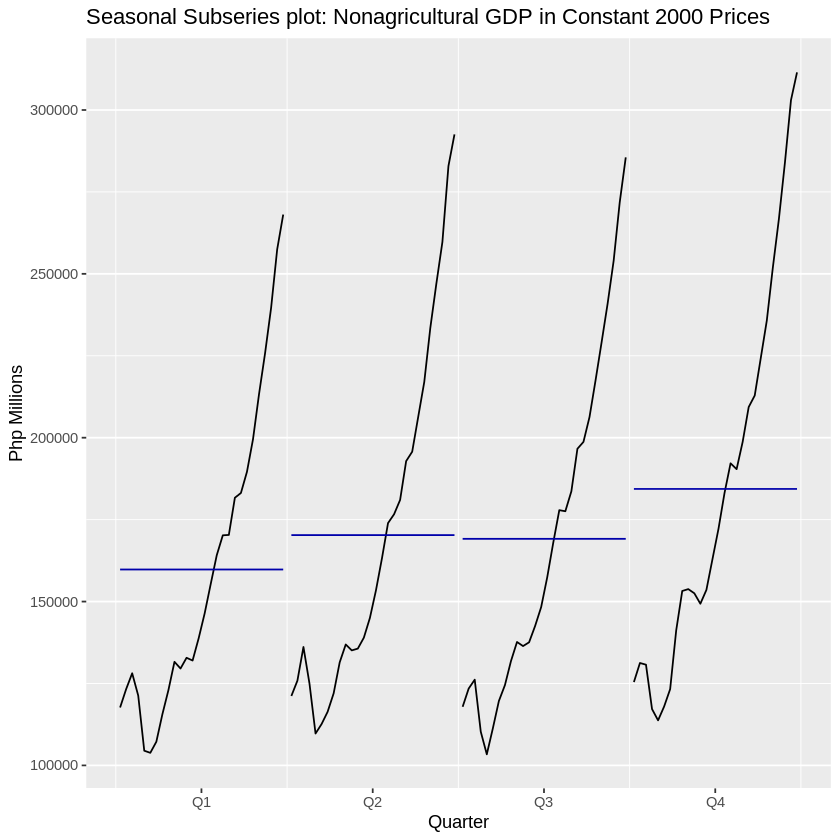

In [31]:
ggsubseriesplot(nonagri) +
  ylab("Php Millions") +
  ggtitle("Seasonal Subseries plot: Nonagricultural GDP in Constant 2000 Prices")

Scatterplots

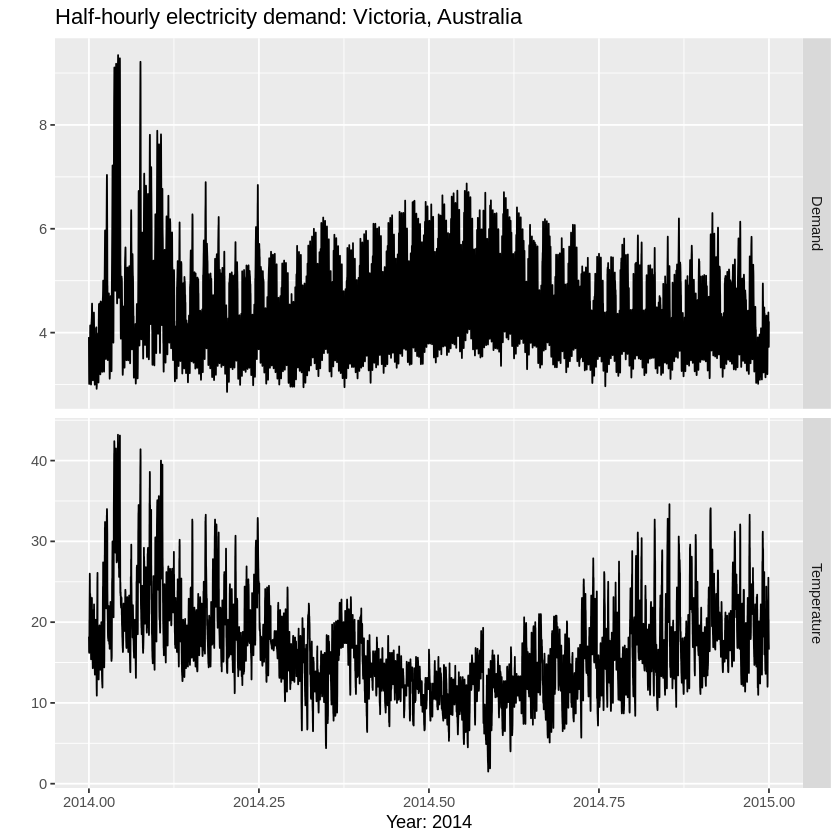

In [32]:
autoplot(elecdemand[,c("Demand","Temperature")], facets=TRUE) + 
  xlab("Year: 2014") + ylab("") +
  ggtitle("Half-hourly electricity demand: Victoria, Australia")

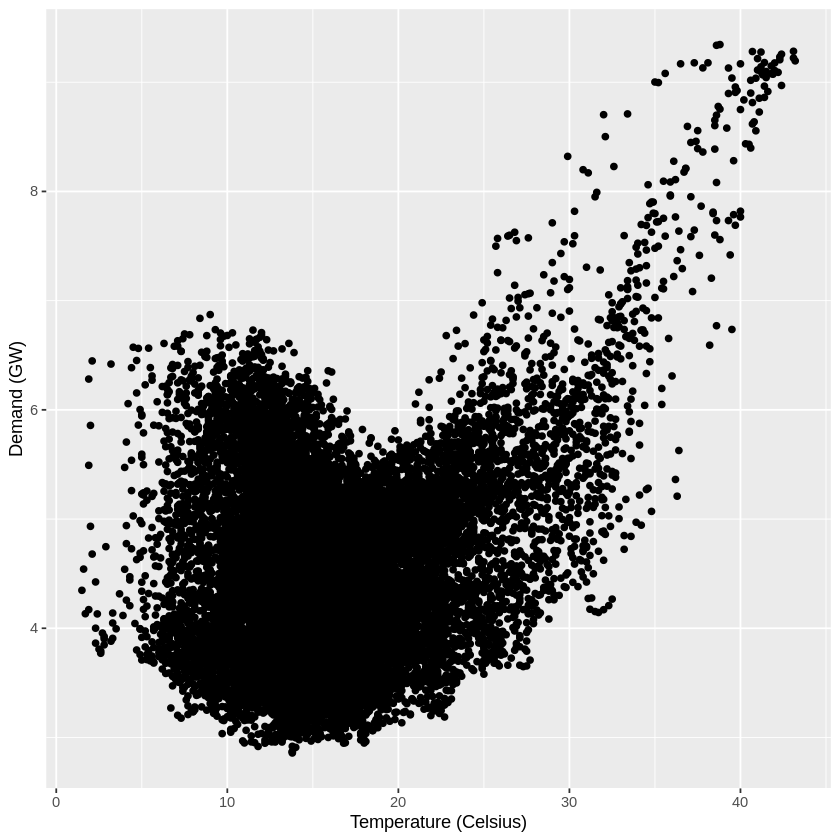

In [33]:
qplot(Temperature, Demand, data=as.data.frame(elecdemand)) +
ylab("Demand (GW)") + xlab("Temperature (Celsius)")

In [36]:
cor(elecdemand[,c("Demand","Temperature")])

,Demand,Temperature
Demand,1.0000000,0.2798072
Temperature,0.2798072,1.0000000


Scatterplot Matrices

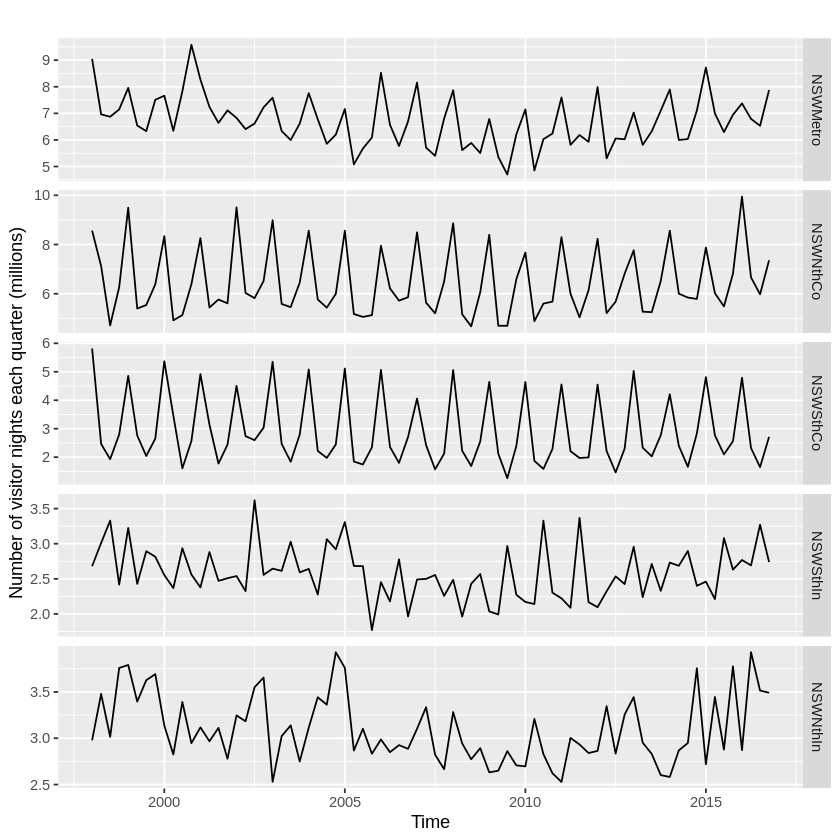

In [37]:
autoplot(visnights[,1:5], facets=TRUE) +
ylab("Number of visitor nights each quarter (millions)")

In [38]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



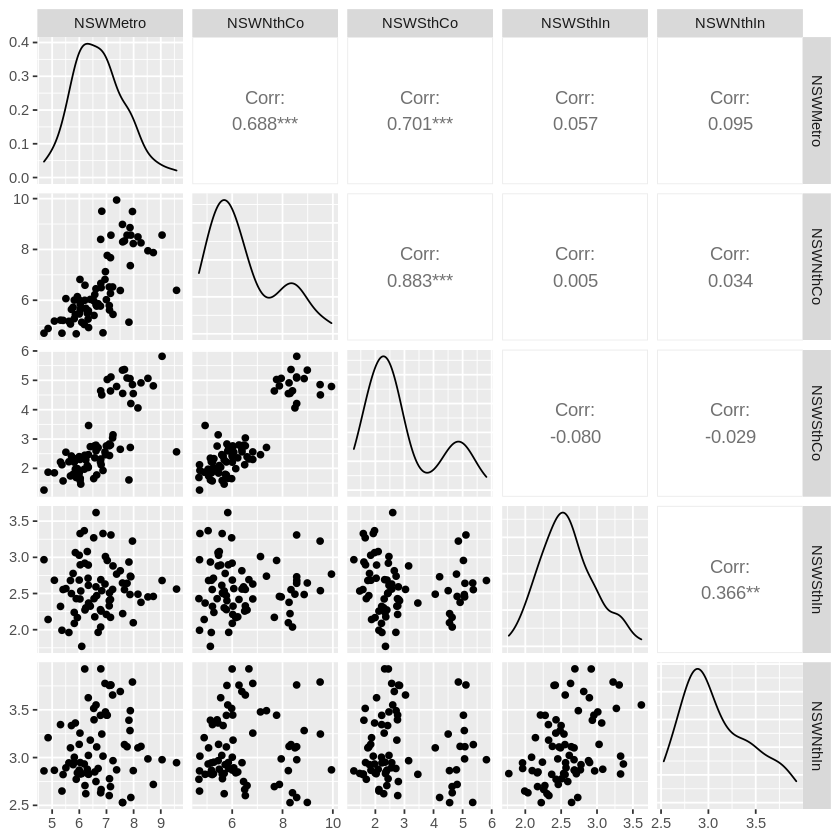

In [39]:
GGally::ggpairs(as.data.frame(visnights[,1:5]))

Lag Plot

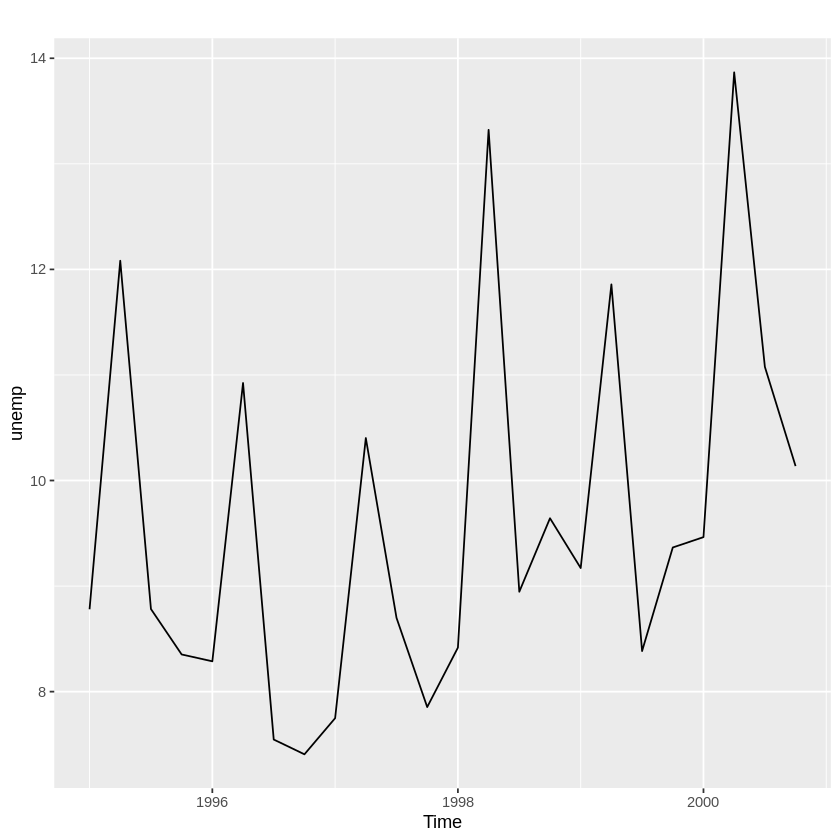

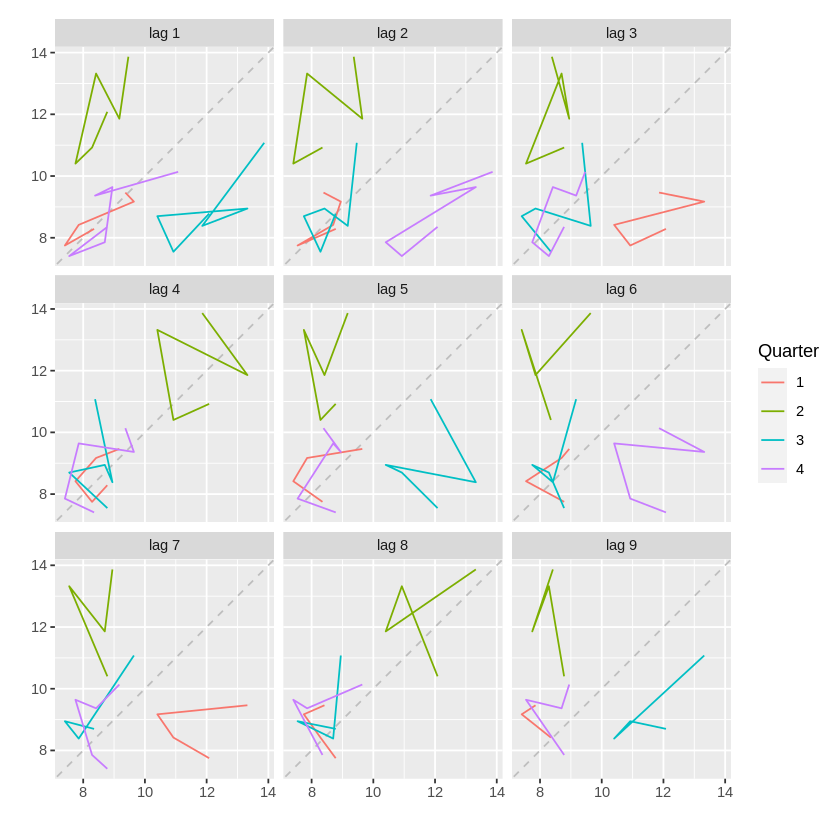

In [45]:
unemp <- Philquarter$unemp %>% na.omit() %>% ts(start = c(1990,3), frequency = 4) %>% window( start = c(1995,1), end = c(2000,4))
autoplot(unemp)
gglagplot(unemp)

Autocorrelation

In [49]:
lag(nonagri, -2)
nonagri

,Qtr1,Qtr2,Qtr3,Qtr4
1981,,,117667.0,121185.0
1982,117881.0,125430.0,123269.0,125858.0
1983,123449.0,131250.0,128112.0,136132.0
1984,126157.0,130730.0,121299.0,124943.0
1985,110288.0,117185.0,104479.0,109727.0
1986,103380.0,113743.0,103833.0,112608.0
1987,111294.0,117963.0,107221.0,116357.0
1988,119656.0,123275.0,115605.0,121997.0
1989,124496.0,141191.0,122980.0,131451.0
1990,131832.0,153221.0,131605.0,136898.0


,Qtr1,Qtr2,Qtr3,Qtr4
1981,117667.0,121185.0,117881.0,125430.0
1982,123269.0,125858.0,123449.0,131250.0
1983,128112.0,136132.0,126157.0,130730.0
1984,121299.0,124943.0,110288.0,117185.0
1985,104479.0,109727.0,103380.0,113743.0
1986,103833.0,112608.0,111294.0,117963.0
1987,107221.0,116357.0,119656.0,123275.0
1988,115605.0,121997.0,124496.0,141191.0
1989,122980.0,131451.0,131832.0,153221.0
1990,131605.0,136898.0,137658.0,153795.0


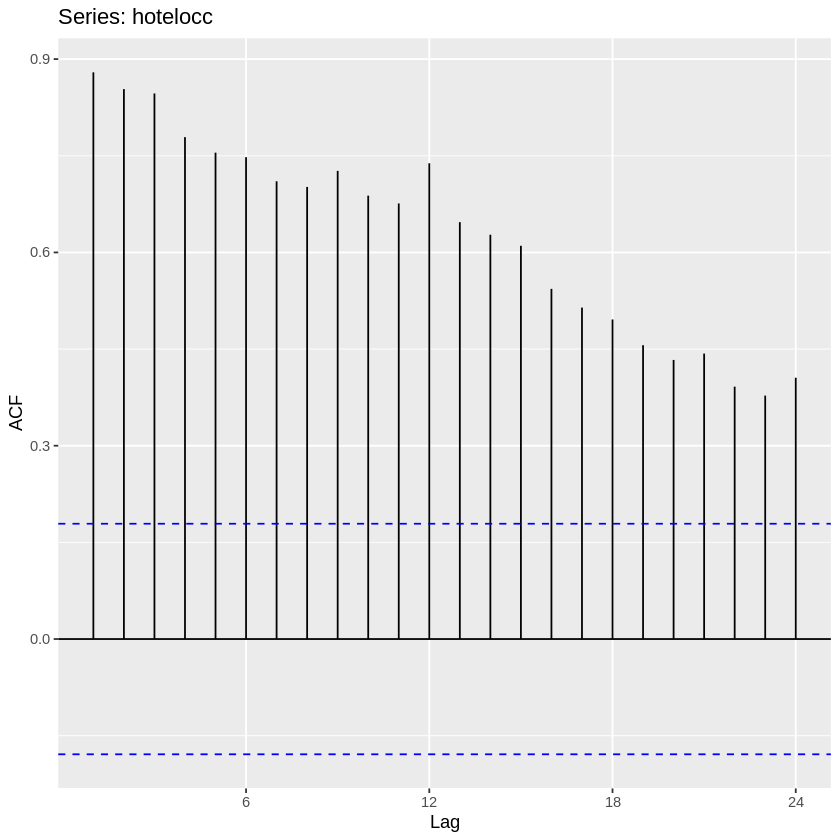

In [50]:
ggAcf(hotelocc)

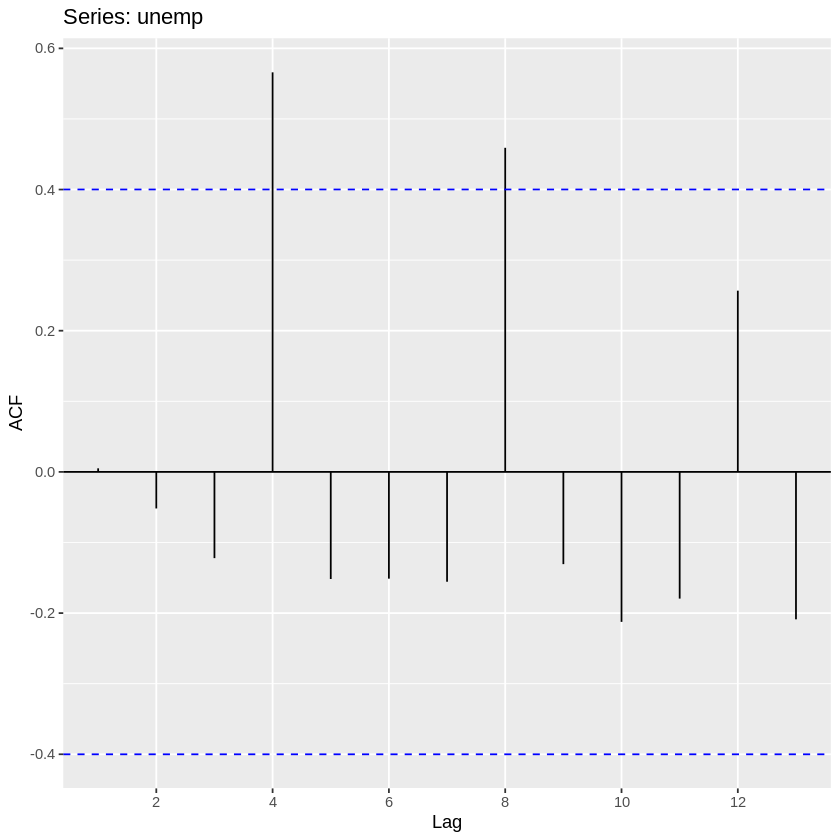

In [51]:
ggAcf(unemp)

White Noise

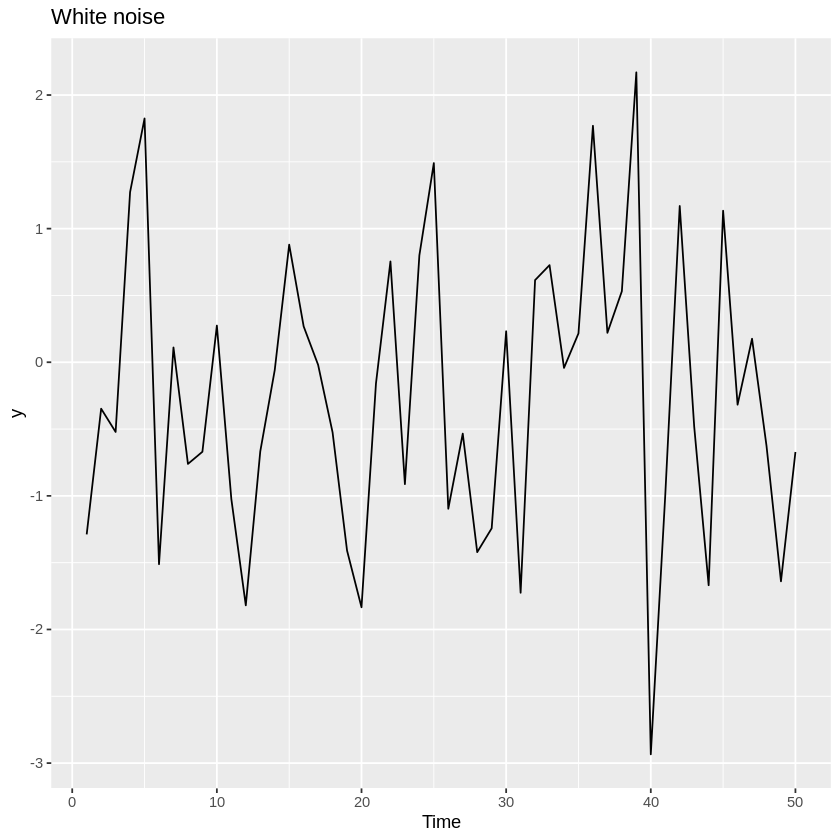

In [52]:
set.seed(30)
y <- ts(rnorm(50))
autoplot(y) + ggtitle("White noise")

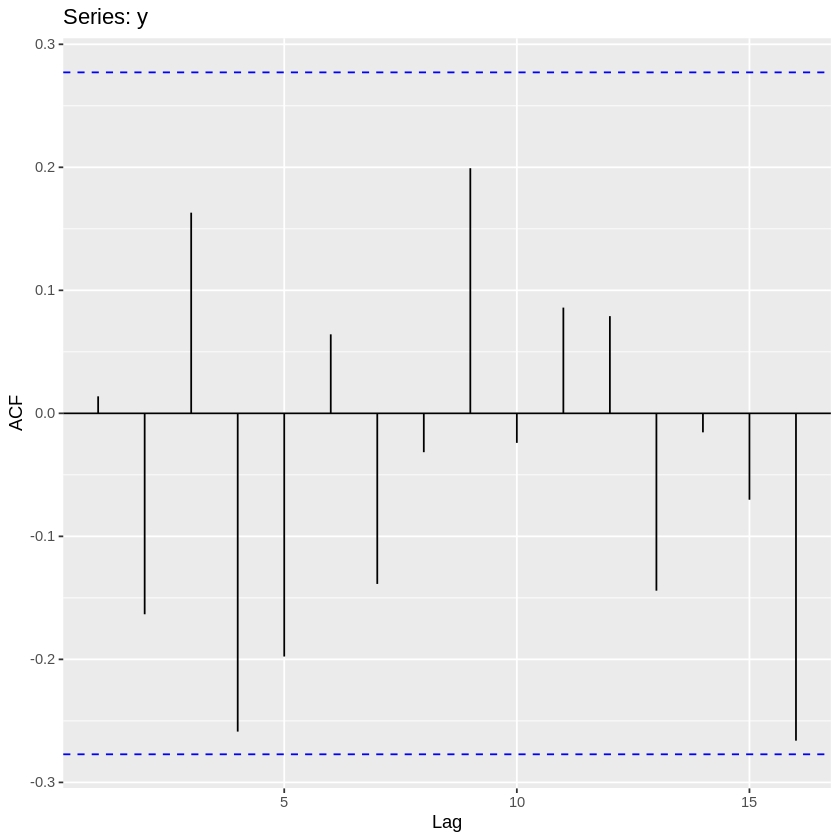

In [53]:
ggAcf(y)